# Building and Tuning a Neural Network Model Using Keras

Did you ever wonder which parameters are most impactful when it comes to neural networkings model tuning? I did. That's why I worked on this project. The goal was to develop intuition about neural network parameter tuning (including hyperparameter).

In this project, I use Keras to build a generic neural network class which can be used to test model performance. With the power of Colab GPU, building and tesing neural networks is a pleasure. So let's do this!

## Setting up the Environment

In [ ]:
!pip install -U xgboost
!pip install scikit-learn==1.3.2

In [ ]:
import numpy as np
import tensorflow as tf

# Set the random seed for reproducibility
np.random.seed(6)
tf.random.set_seed(6)

#Create a RandomState object for specific NumPy random operations
random_state = np.random.RandomState(6)

In [ ]:
import pandas as pd
import sklearn
import pickle
from time import time
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Input

## Getting the Data

In [ ]:
# Install Kaggle API
!pip install -U -q kaggle

In [ ]:
import os

# Set the Kaggle API credentials directly
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [ ]:
# Download the dataset
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
pima = pd.read_csv('pima-indians-diabetes-database.zip')
print(pima.head())

# Get the features and labels as np arrays
X, y = pima.values[:, 0:8], pima.values[:, 8]
print(pima.shape, pima.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9) (768, 9)


In [ ]:
# Check percentage of both classes
pima['Outcome'].value_counts()/pima.shape[0]

,count
Outcome,
0,0.651042
1,0.348958


## Getting a Baseline Result with XGBoost

In [ ]:
t1 = time()
clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=random_state
)

# Create cross-validation object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
t2 = time()
t = t2 - t1

print("Mean Accuracy: {:.2%}, Standard Deviation: {:.2%}".format(scores.mean(), scores.std()))
print("Time taken: {:.2f} seconds".format(t))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Mean Accuracy: 71.49%, Standard Deviation: 6.86%
Time taken: 5.28 seconds


In [ ]:
# Let's test with data standardization:
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

scores = cross_val_score(clf, X_std, y, cv=cv)

print("Mean Accuracy: {:.2%}, Standard Deviation: {:.2%}".format(scores.mean(), scores.std()))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Mean Accuracy: 73.58%, Standard Deviation: 4.06%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Building the Neural Network Class and Test Functions

In [ ]:
class SequentialModel:
    """
    The base class for a Neural Networks model
    """

    def __init__(self, input_dim, num_layers, num_units,
                 activation, activation_out,
                 loss, initializer, optimizer, learning_rate,
                 epochs, batch_size, metrics=['accuracy'], one_hot=False):

        self.input_dim = input_dim
        self.num_layers = num_layers
        self.num_units = [num_units, 1]
        self.activation = activation
        self.activation_out = activation_out
        self.loss = loss
        self.initializer = initializer
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.metrics = metrics
        self.epochs = epochs
        self.batch_size = batch_size
        self.one_hot = one_hot

        # Initialize the sequential model
        self.model = Sequential()

    def build_model(self):
        """
        Adds layers and compiles the model
        """
        # Ensure num_units list's length is the same as num_layers
        if self.num_layers != len(self.num_units):
            # Expand the list by repeating number of nodes except for last layer
            num_nodes, num_nodes_out = self.num_units[0], self.num_units[-1]
            self.num_units = [num_nodes] * (self.num_layers - 1)
            self.num_units.append(num_nodes_out)

        # Add Input layer first
        self.model.add(Input(shape=(self.input_dim,)))

        # Loop through all the layers
        for i in range(self.num_layers):
            if i + 1 == self.num_layers:  # output layer
                self.model.add(Dense(units=self.num_units[i],
                                   kernel_initializer=self.initializer,
                                   activation=self.activation_out))
            else:  # hidden layers
                self.model.add(Dense(units=self.num_units[i],
                                   kernel_initializer=self.initializer,
                                   activation=self.activation))

        # Handle optimizer
        if self.optimizer.lower() == 'adam':
            from keras.optimizers import Adam
            optimizer = Adam(learning_rate=self.learning_rate)
        elif self.optimizer.lower() == 'sgd':
            from keras.optimizers import SGD
            optimizer = SGD(learning_rate=self.learning_rate)
        elif self.optimizer.lower() == 'rmsprop':
            from keras.optimizers import RMSprop
            optimizer = RMSprop(learning_rate=self.learning_rate)
        else:
            raise ValueError(f"Unsupported optimizer: {self.optimizer}")

        # Compile the model
        self.model.compile(loss=self.loss,
                         optimizer=optimizer,
                         metrics=self.metrics)


    def evaluate_model(self, X, y, n_splits=10):
      """
      Evaluates the model using cross-validation.

      Params:
        X: np.array, features
        y: np.array, labels
        n_splits: int, number of folds for the cross-validation
      Returns:
        mean_accuracy: float, the average accuracy based on the cross-validation.

      """
      score_lst = []
      t1 = time()

      print("Starting {}-fold cross-validation...".format(n_splits))

      kfold = StratifiedKFold(n_splits=n_splits,
                              shuffle=True,
                              random_state=random_state)

      # Loop through the different folds
      for train_index, test_index in kfold.split(X, y):
        # Do one-hot encoding when needed
        if self.one_hot:
          y_one_hot = to_categorical(y)
        else:
          y_one_hot = y

        self.model.fit(X[train_index],
                      y_one_hot[train_index],
                      epochs=self.epochs,
                      batch_size=self.batch_size,
                      verbose=0)

        scores = self.model.evaluate(X[test_index],
                                    y_one_hot[test_index],
                                    verbose=0)

        # The second item is accuracy
        score_lst.append(scores[1])

      t2 = time()
      t = t2 - t1
      # Convert time to mintues
      t /= 60

      print("Finished cross-valiation. Took {:.1f} mintues.".format(t))

      # Convert to np.array and calculate mean and sd
      score_lst = np.array(score_lst)
      mean_acc = score_lst.mean()
      sd_acc = score_lst.std()

      print("Mean Accuracy: {:.2%}, Standard Deviation: {:.2%}".format(mean_acc, sd_acc))
      return mean_acc

In [ ]:
def get_defaults(input_dim=8,
                 num_layers=2,
                 num_units=8,
                 activation='relu',
                 activation_out='sigmoid',
                 loss='binary_crossentropy',
                 initializer='random_uniform',
                 optimizer='Adam',
                 learning_rate=0.001,
                 metrics=['accuracy'],
                 epochs=10,
                 batch_size=4,
                 one_hot=False):
  """
  Returns a dict of default hyperparameter values
  """

  defaults = {'input_dim': input_dim,
              'num_layers': num_layers,
              'num_units': num_units,
              'activation': activation,
              'activation_out': activation_out,
              'loss': loss,
              'initializer': initializer,
              'optimizer': optimizer,
              'learning_rate': learning_rate,
              'metrics': metrics,
              'epochs': epochs,
              'batch_size': batch_size,
              'one_hot': one_hot}

  return defaults


def get_tuning_options(**kwargs):
  """
  Defines tuning parameter and corresponding options

  Params:
    Keyword arguments - the key words can be any of the following:
      input_dim, num_layers, num_units, activation, activation_out,
      loss, initializer, optimizer, learning_rate, epochs, batch_size,
      metrics=['accuracy'], one_hot=False
  Returns:
    tuning_options: Python dict made up of the given keyword, argument pairs

  """
  tuning_options = {}

  for param, options in kwargs.items():
    tuning_options[param] = options

  return tuning_options

In [ ]:
def build_eval(X, y, param_dict):
  """
  Builds a Neural Network model using the given params and returns the
  cross-validation accuracy

  Params:
    X: np.array, the features
    y: np.array, the labels
    param_dict: Python dict containing the tuning parameters and values

  Returns:
    result: float, percentage accuracy based on cross-validation
  """
  print("Building model using param_dict:\n {}".format(param_dict))

  model = SequentialModel(input_dim=param_dict['input_dim'],
                          num_layers=param_dict['num_layers'],
                          num_units=param_dict['num_units'],
                          activation=param_dict['activation'],
                          activation_out=param_dict['activation_out'],
                          loss=param_dict['loss'],
                          initializer=param_dict['initializer'],
                          optimizer=param_dict['optimizer'],
                          learning_rate=param_dict['learning_rate'],
                          epochs=param_dict['epochs'],
                          batch_size=param_dict['batch_size'])
  model.build_model()
  result = model.evaluate_model(X, y)

  return result


def run_test(X, y, param_dict, tuning_options=None):
  """
  Tests different parameter's accurcy using the given tuning options

  Params:
    X: np.array, the features
    y: np.array, the labels
    param_dict: Python dict containing the tuning parameters and values
    tuning_options: Python dict made up of the given keyword, argument pairs
  Returns:
    results: a dict when tuning_options is provided, otherwise a float that's the mean accuracy.

  """
  if tuning_options:
    results = {}

    for parameter, options in  tuning_options.items():
      results[parameter] = {}
      param_dict_temp = deepcopy(param_dict)

      for option in options:
        print("\nEvaluating parameter \"{}\" using value \"{}\"...".format(parameter, option))
        # Update the corresponding parameter
        param_dict_temp[parameter] = option

        try:
          #print("param_dict_temp: {}".format(param_dict_temp))
          results[parameter][option] = build_eval(X, y, param_dict_temp)
        except Exception as e:
          results[parameter][option] = 'NaN'
          print('Error: {}, skipping...'.format(e))
          pass
    return results

  else:
    return build_eval(X, y, param_dict)

In [ ]:
def wrangle_results(results):
    """
    Transforms the results dict into a df that's good for analysis.

    Params:
      results: dict, the results dict returned by the build_eval() function

    Returns:
        df_plot: pandas df, the wrangled long format dataframe
    """
    df = pd.DataFrame(results)
    # Get the col names as value vars for melt func
    value_vars = df.columns.tolist()
    # Reset index and rename the index col
    df = df.reset_index().rename(columns={'index': 'option'})
    # Transform from wide to long format for easy plotting
    df_long = pd.melt(df, id_vars='option', value_vars=value_vars)
    df_long = df_long.rename(columns={'variable': 'parameter'})
    # Exclude the zero and null values
    df_long = df_long[~df_long['value'].isnull()]
    df_long = df_long.query("value!=0 & value!='NaN'")

    # Calculate the range and sd of each parameter group and convert to a df
    ranges = df_long.groupby('parameter').apply(lambda grp: grp.value.max() - grp.value.min())
    sd = df_long.groupby('parameter').apply(lambda grp: grp.value.std())
    spread = pd.concat([ranges, sd], axis=1).rename(columns={0: 'ranges', 1: 'sd'})
    # Join back the df
    df_spread = pd.merge(df_long, spread, how='left', left_on='parameter', right_index=True)
    # Reorder columns
    df_spread = df_spread[['parameter', 'option', 'value', 'ranges', 'sd']]
    # Remove the row with zero value
    df_spread = df_spread.query('ranges!=0')
    # Change column dtype
    df_spread['value'] = df_spread['value'].astype(float)
    # Sort the dataframe and use the resulting index to slice
    # This ensures the plot will be ordered accordingly
    idx = df_spread.sort_values(by=['ranges', 'option'], ascending=False).index
    df_plot = df_spread.loc[idx, :]

    return df_plot


def get_best_options(df):
  """
  Gets the best options for all params from the given results df

  Params:
    df: the results df returned by the wrangle_results() function

  Returns:
    best_options: a list of list containing param and value.

  """
  best_options = df.groupby('parameter').apply(lambda grp: grp.nlargest(1, 'value'))[['parameter', 'option']].values.tolist()

  return best_options


def visualize_distribution(df, save_figure=False):
    """
    Visualizes the result distribution using boxplot and swarmplot

    Params:
      df: pandas df, the wrangled results df returned by the wrangle_results function
      save_figure: boolean, whether to save the figure or not
    """
    fig, ax = plt.subplots(figsize=(16, 12))
    df['value'] = df['value'].astype(float)
    sns.boxplot(x='parameter', y='value', data=df, ax=ax)
    sns.swarmplot(x='parameter', y='value', data=df, size=12, ax=ax)
    ax.set_xlabel('Parameters', size=16)
    ax.set_ylabel('Values', size=16)
    fig_title = 'Parameter Tuning Results Distribution'
    ax.set_title(fig_title, y=1.05, fontsize=30)

    if save_figure:
        try:
            # Save directly to /content directory
            figure_name = '/content/' + fig_title + '.png'
            fig.savefig(figure_name, dpi=300, bbox_inches='tight')
            print(f"Figure saved successfully to: {figure_name}")
        except Exception as e:
            print(f"Error saving figure: {str(e)}")

    plt.show()


def visualize_trend(df, save_figure=False):
    """
    Visualizes the result trend using line plot

    Params:
      df: pandas df, the wrangled results df returned by the wrangle_results function.
      save_figure: boolean, whether to save the figure or not.
    """
    fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(30, 12))
    axes = axes.flatten()
    # Get the parameter list
    params = df.parameter.unique().tolist()
    # Loop thru the axes
    for i, ax in enumerate(axes):
        try:
            # Each subplot corresponds to one parameter
            param = params[i]
            df_param = df.query("parameter==@param")
            df_param.plot(kind='line', x='option', y='value', ax=ax)
            # Log-transform the x-axis for learning rate to avoid mixing up
            if param == 'learning_rate':
                ax.set_xscale('log')
            # Set the x ticks and tick labels
            if param in ('initializer', 'optimizer'):
                ax.set_xticks(np.arange(5))
                ax.set_xticklabels(df_param.option)
            ax.set_xlabel(param, fontsize=16)
            ax.set_ylabel('Accuracy', fontsize=16)
            ax.get_legend().remove()
        except Exception as e:
            print(f"Warning for subplot {i}: {str(e)}")

    fig_title = 'Parameter Tuning Trend'
    fig.suptitle(fig_title, y=0.92, verticalalignment='bottom', fontsize=30)

    if save_figure:
        try:
            # Save directly to /content directory
            figure_name = '/content/' + fig_title + '.png'
            fig.savefig(figure_name, dpi=300, bbox_inches='tight')
            print(f"Figure saved successfully to: {figure_name}")
        except Exception as e:
            print(f"Error saving figure: {str(e)}")

    plt.show()

## Running the Test

In [ ]:
# Get baseline accuracy using defauls with the defined Neural Networks class
param_dict_defaults, param_dict = get_defaults(), get_defaults()
accuracy_baseline = run_test(X=X, y=y, param_dict=param_dict_defaults)

Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 74.74%, Standard Deviation: 4.85%


In [ ]:
# Get the tuning optioins
num_units = [4, 8, 16, 32, 64]
num_layers = [2, 4, 8, 16, 32]
loss = ['binary_crossentropy', 'categorical_crossentropy', 'sparse_categorical_crossentropy']
initializer = ['random_uniform', 'random_normal', 'TruncatedNormal', 'glorot_normal', 'glorot_uniform']
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1]
optimizer = ['adam', 'adamax', 'adagrad', 'sgd', 'rmsprop']
epochs = [5, 10, 20, 40, 80]
batch_size = [1, 2, 4, 8, 16]

tuning_options = get_tuning_options(num_units=num_units,
                                    num_layers=num_layers,
                                    loss=loss,
                                    initializer=initializer,
                                    learning_rate=learning_rate,
                                    optimizer=optimizer,
                                    epochs=epochs,
                                    batch_size=batch_size)

# Test all the tuning options
results = run_test(X=X, y=y,
                   param_dict=param_dict_defaults,
                   tuning_options=tuning_options)

import os
import pickle

# Define a save path - either use current directory or specify a full path
save_path = os.path.join(os.getcwd(), 'cross_validation_results.pkl')

# Save the tuning results with error handling
try:
    with open(save_path, 'wb') as f:
        pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)
    print(f"\nResults saved successfully to: {save_path}")
except Exception as e:
    print(f"Error saving results: {str(e)}")


Evaluating parameter "num_units" using value "8"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 72.92%, Standard Deviation: 2.99%

Evaluating parameter "num_layers" using value "4"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 4, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 66.29%, Standard Deviation: 3.7

/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Finished cross-valiation. Took 0.5 mintues.
Mean Accuracy: 65.11%, Standard Deviation: 0.34%

Evaluating parameter "initializer" using value "glorot_normal"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'glorot_normal', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 70.44%, Standard Deviation: 7.28%

Evaluating parameter "learning_rate" using value "0.01"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.01, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold

In [ ]:
import os
import pickle
import pandas as pd

load_path = os.path.join(os.getcwd(), '/content/cross_validation_results.pkl')

# Load the results with error handling
try:
    with open(load_path, 'rb') as f:
        results = pickle.load(f)
    print(f"Results loaded successfully from: {load_path}")

    # Process the results using wrangle_results
    df = wrangle_results(results)
    print("Results processed successfully")

except FileNotFoundError:
    print(f"Error: Could not find the file at {load_path}")
except Exception as e:
    print(f"Error loading or processing results: {str(e)}")

Results loaded successfully from: /content/cross_validation_results.pkl
Results processed successfully


<ipython-input-124-7505f33621d6>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranges = df_long.groupby('parameter').apply(lambda grp: grp.value.max() - grp.value.min())
<ipython-input-124-7505f33621d6>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd = df_long.groupby('parameter').apply(lambda grp: grp.value.std())


Figure saved successfully to: /content/Parameter Tuning Results Distribution.png


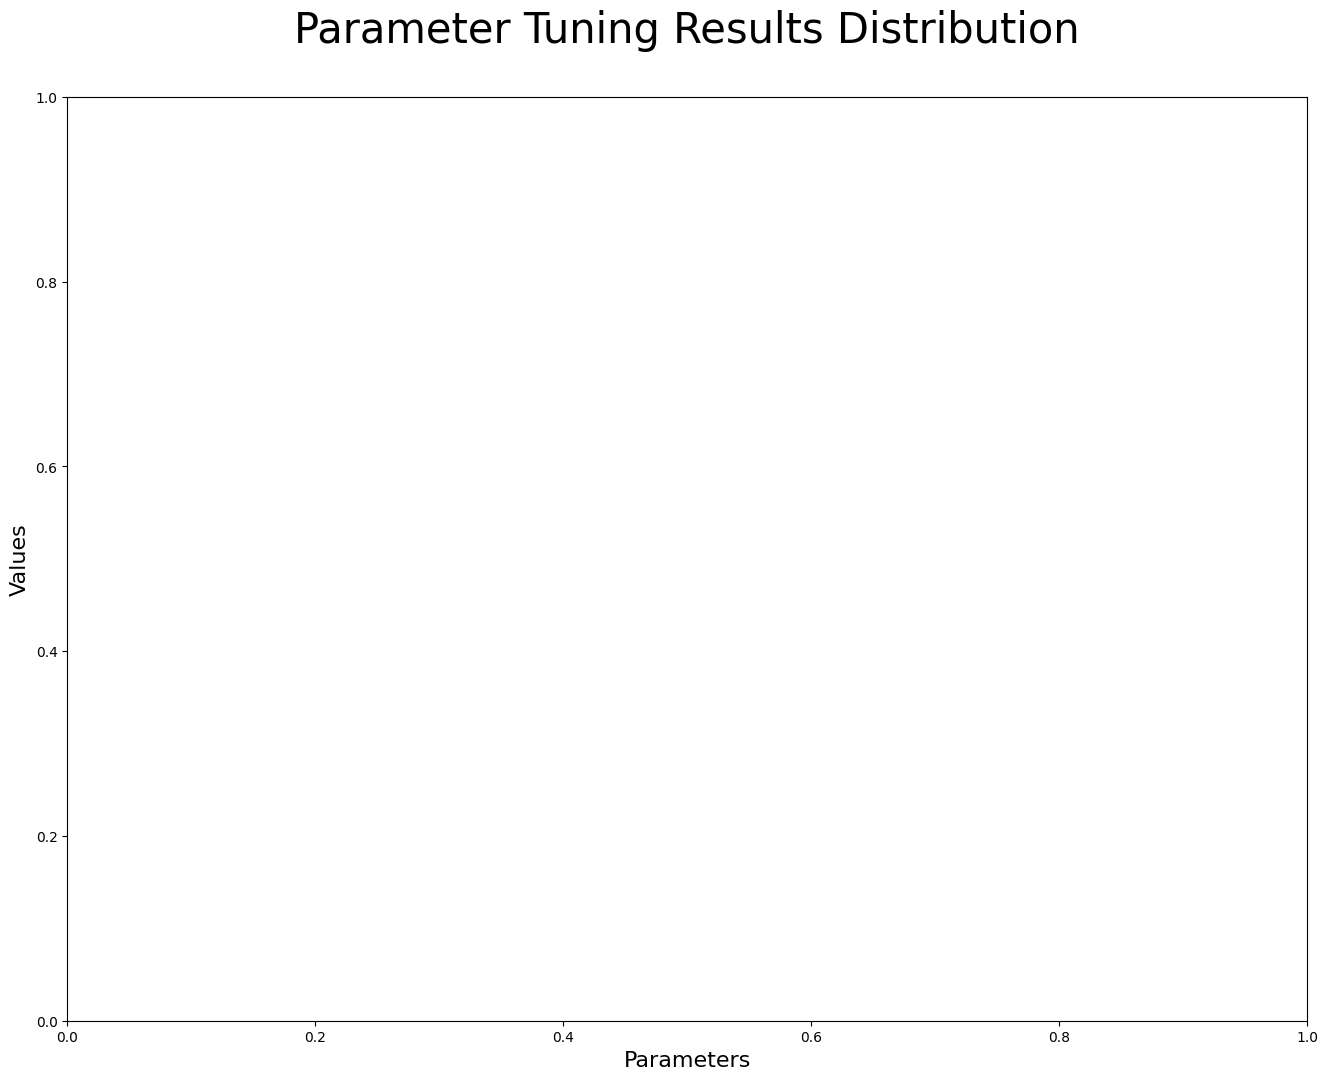

In [ ]:
visualize_distribution(df, save_figure=True)

Warning for subplot 0: list index out of range
Warning for subplot 1: list index out of range
Warning for subplot 2: list index out of range
Warning for subplot 3: list index out of range
Warning for subplot 4: list index out of range
Warning for subplot 5: list index out of range
Warning for subplot 6: list index out of range
Warning for subplot 7: list index out of range
Figure saved successfully to: /content/Parameter Tuning Trend.png


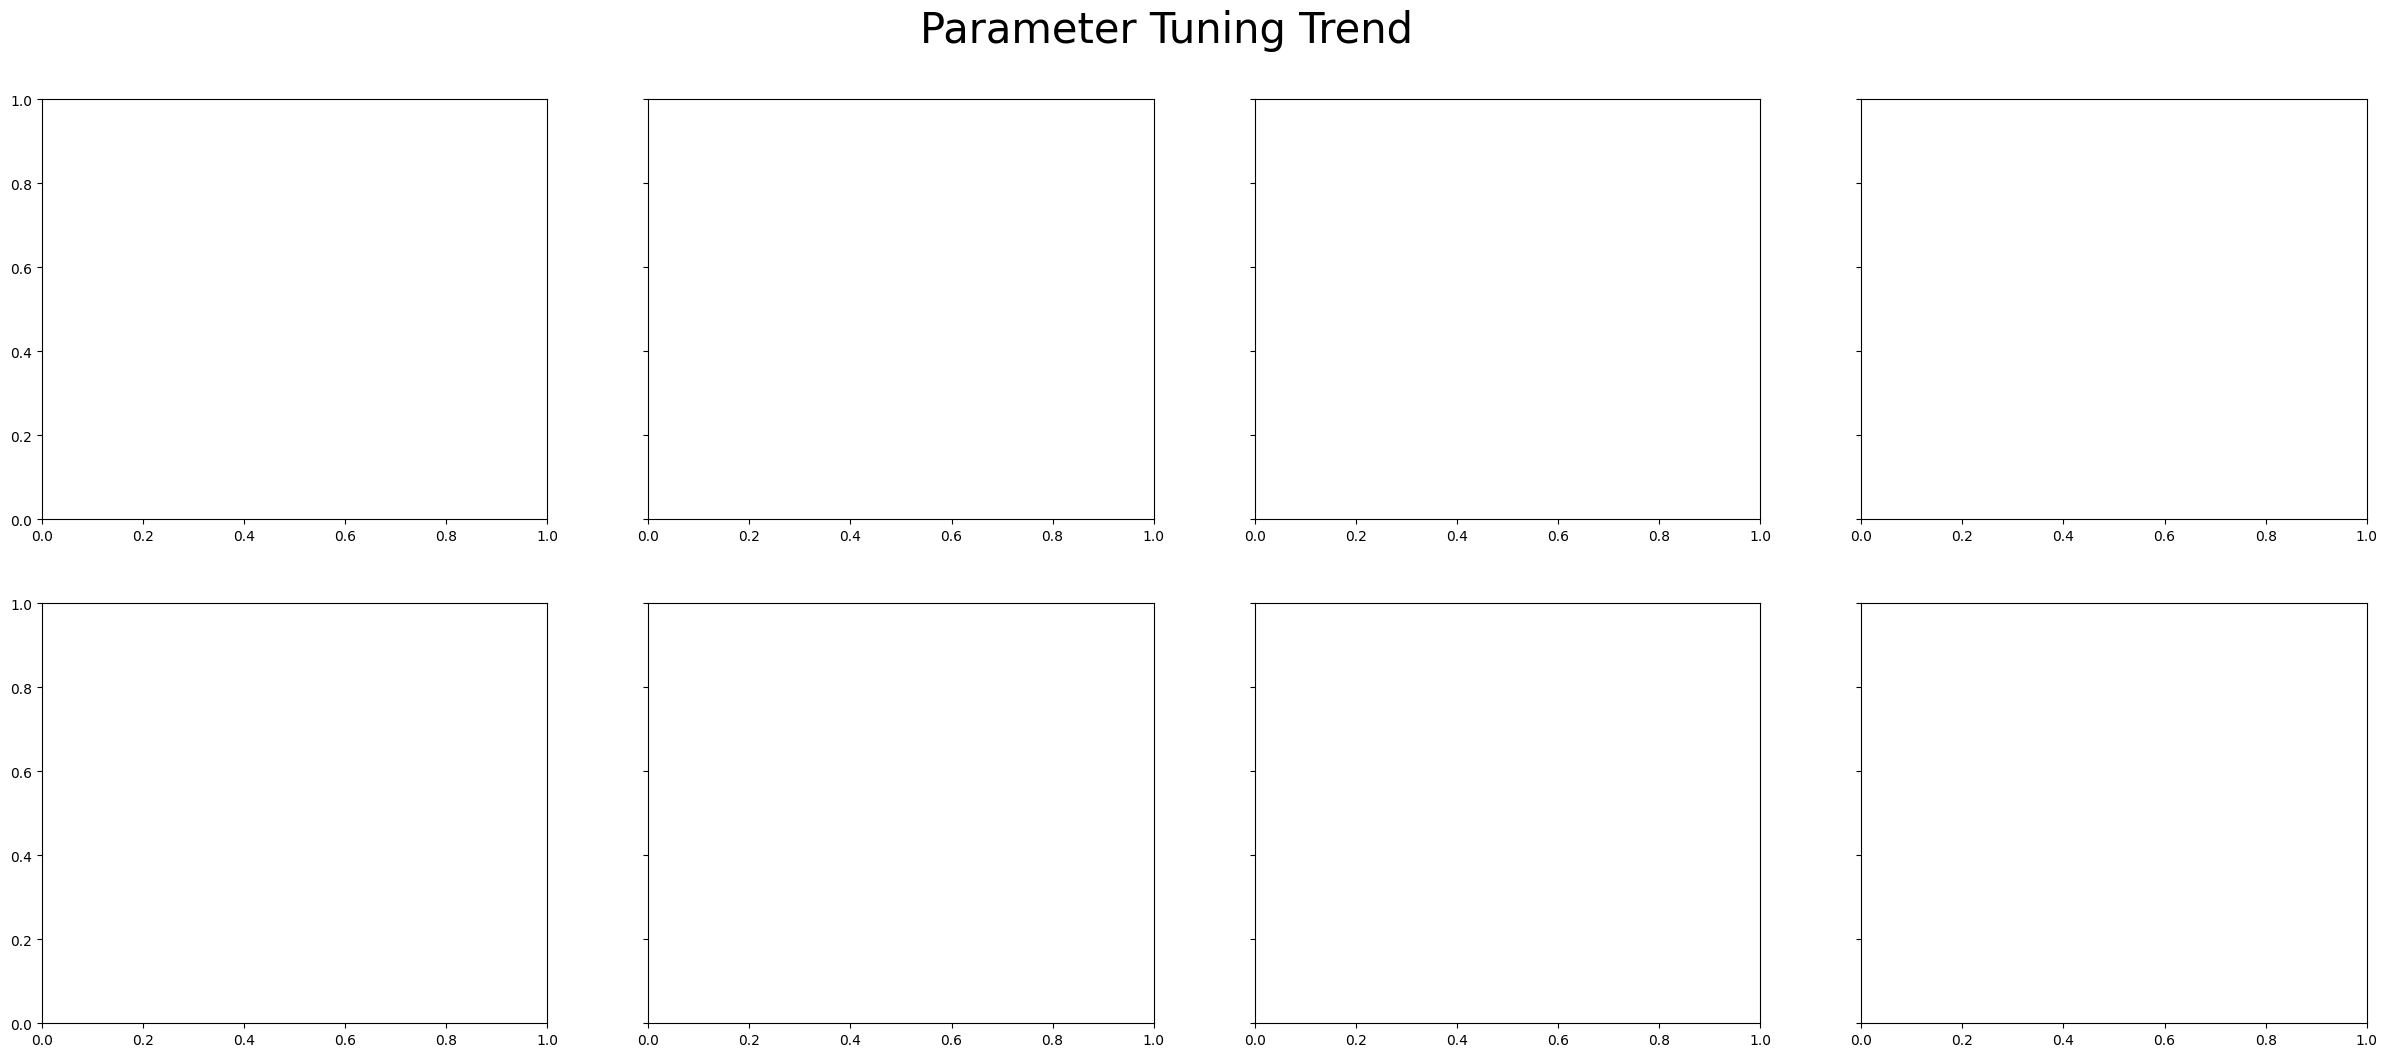

In [ ]:
visualize_trend(df, save_figure=True)

In [ ]:
best_options = get_best_options(df)
print(best_options)

for i in best_options:
  param_dict[i[0]] = i[1]
print(param_dict)

[]
{'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}


<ipython-input-134-3bd640a0b766>:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_options = df.groupby('parameter').apply(lambda grp: grp.nlargest(1, 'value'))[['parameter', 'option']].values.tolist()


In [ ]:
# Build a model using the best options
run_test(X=X, y=y, param_dict=param_dict)

Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 72.26%, Standard Deviation: 5.85%


0.7226418375968933

Wow, that's brutal - it took almost 50 minutes! But I guess I cannot complain since the result is great! Definitely close to top results for this dataset. Let's now try tuning individual parameters using the default parameter settings. First, start with learning rate.



In [ ]:
# Get the default params
param_dict = get_defaults()

# Get 6 randomly generated learning rates between 0.0001 and 0.01
bases = np.repeat(10, 3)
exponents_1 = -(np.random.rand(3) + 3) # 3 from between 0.0001 and 0.001
exponents_2 = -(np.random.rand(3) + 2) # another 3 between 0.001 and 0.01

learning_rate = np.power(bases, exponents_1).tolist() + np.power(bases, exponents_2).tolist()

tuning_options = get_tuning_options(learning_rate=learning_rate)

results_lr = run_test(X=X, y=y,
                      param_dict=param_dict,
                      tuning_options=tuning_options)


Evaluating parameter "learning_rate" using value "0.00012797933481875225"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.00012797933481875225, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 69.67%, Standard Deviation: 3.74%

Evaluating parameter "learning_rate" using value "0.0004656077437854769"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0004656077437854769, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished 

<ipython-input-134-3bd640a0b766>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranges = df_long.groupby('parameter').apply(lambda grp: grp.value.max() - grp.value.min())
<ipython-input-134-3bd640a0b766>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd = df_long.groupby('parameter').apply(lambda grp: grp.value.std())


Warning for subplot 1: list index out of range
Warning for subplot 2: list index out of range
Warning for subplot 3: list index out of range
Warning for subplot 4: list index out of range
Warning for subplot 5: list index out of range
Warning for subplot 6: list index out of range
Warning for subplot 7: list index out of range


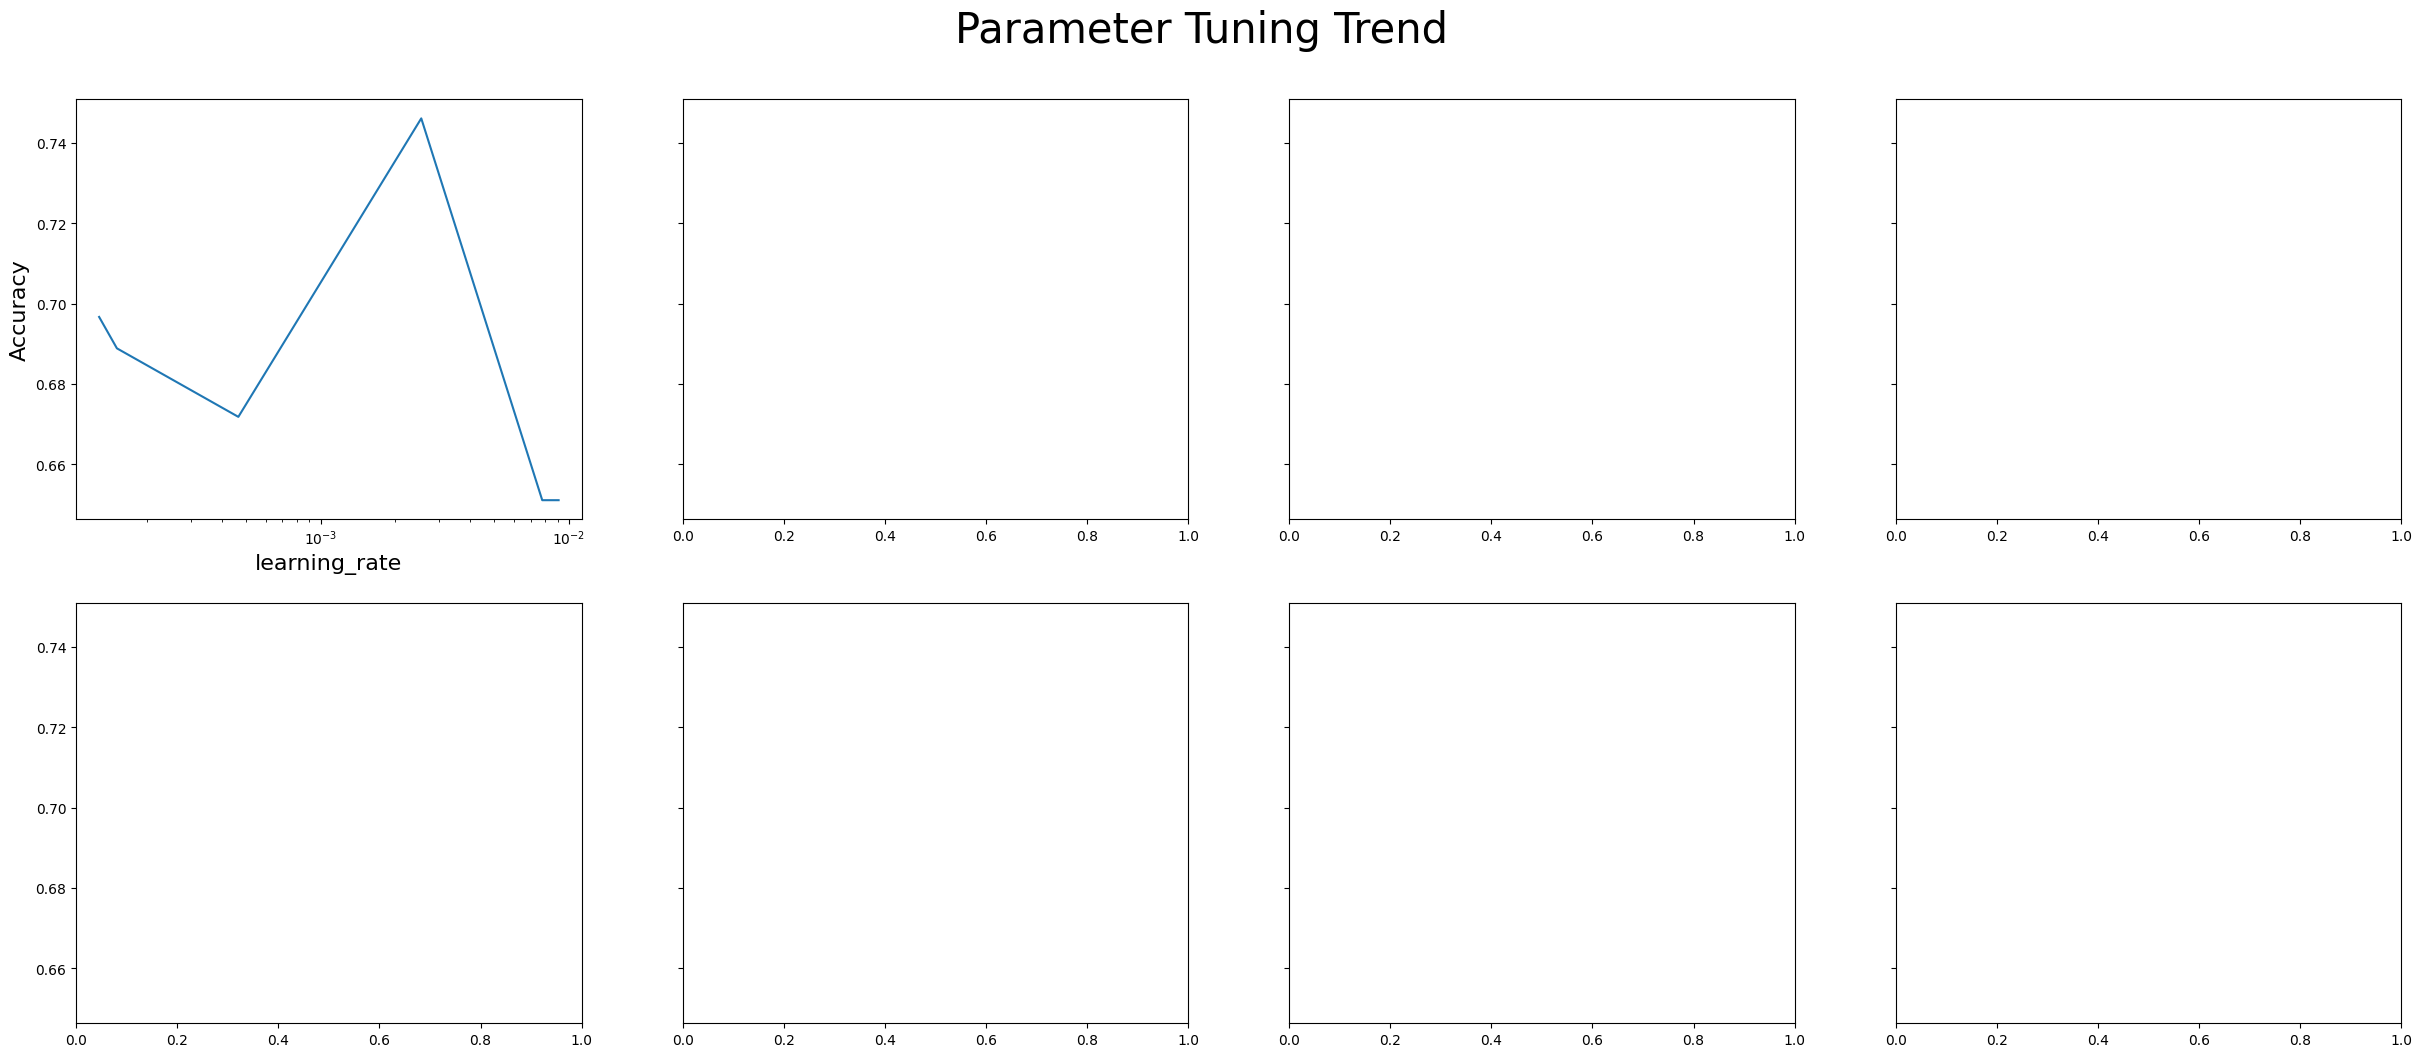

In [ ]:
df_lr = wrangle_results(results_lr)
visualize_trend(df_lr)

In [ ]:
best_lr = get_best_options(df_lr)
best_lr

<ipython-input-134-3bd640a0b766>:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_options = df.groupby('parameter').apply(lambda grp: grp.nlargest(1, 'value'))[['parameter', 'option']].values.tolist()


[['learning_rate', 0.0025406681062440273]]

In [ ]:
param_dict['learning_rate'] = best_lr[0][1]

run_test(X=X, y=y, param_dict=param_dict)

Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 68.49%, Standard Deviation: 2.47%


0.6848769724369049

Let's check the baseline model and confirm the model above is indeed better:

In [ ]:
accuracy_baseline

0.747419685125351

Great! We have an alomost 2 percentage points improvement!

Next, let's keep the updated learning rate and tune batch size:

In [ ]:
batch_size = [2 ** e for e in range(6)]

tuning_options = get_tuning_options(batch_size=batch_size)

results_batch = run_test(X=X, y=y,
                         param_dict=param_dict,
                         tuning_options=tuning_options)


Evaluating parameter "batch_size" using value "1"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 1, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 2.1 mintues.
Mean Accuracy: 64.20%, Standard Deviation: 4.24%

Evaluating parameter "batch_size" using value "2"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 2, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 1.0 mintues.
Mean Accuracy

Warning for subplot 1: list index out of range
Warning for subplot 2: list index out of range
Warning for subplot 3: list index out of range
Warning for subplot 4: list index out of range
Warning for subplot 5: list index out of range
Warning for subplot 6: list index out of range
Warning for subplot 7: list index out of range


<ipython-input-134-3bd640a0b766>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranges = df_long.groupby('parameter').apply(lambda grp: grp.value.max() - grp.value.min())
<ipython-input-134-3bd640a0b766>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd = df_long.groupby('parameter').apply(lambda grp: grp.value.std())


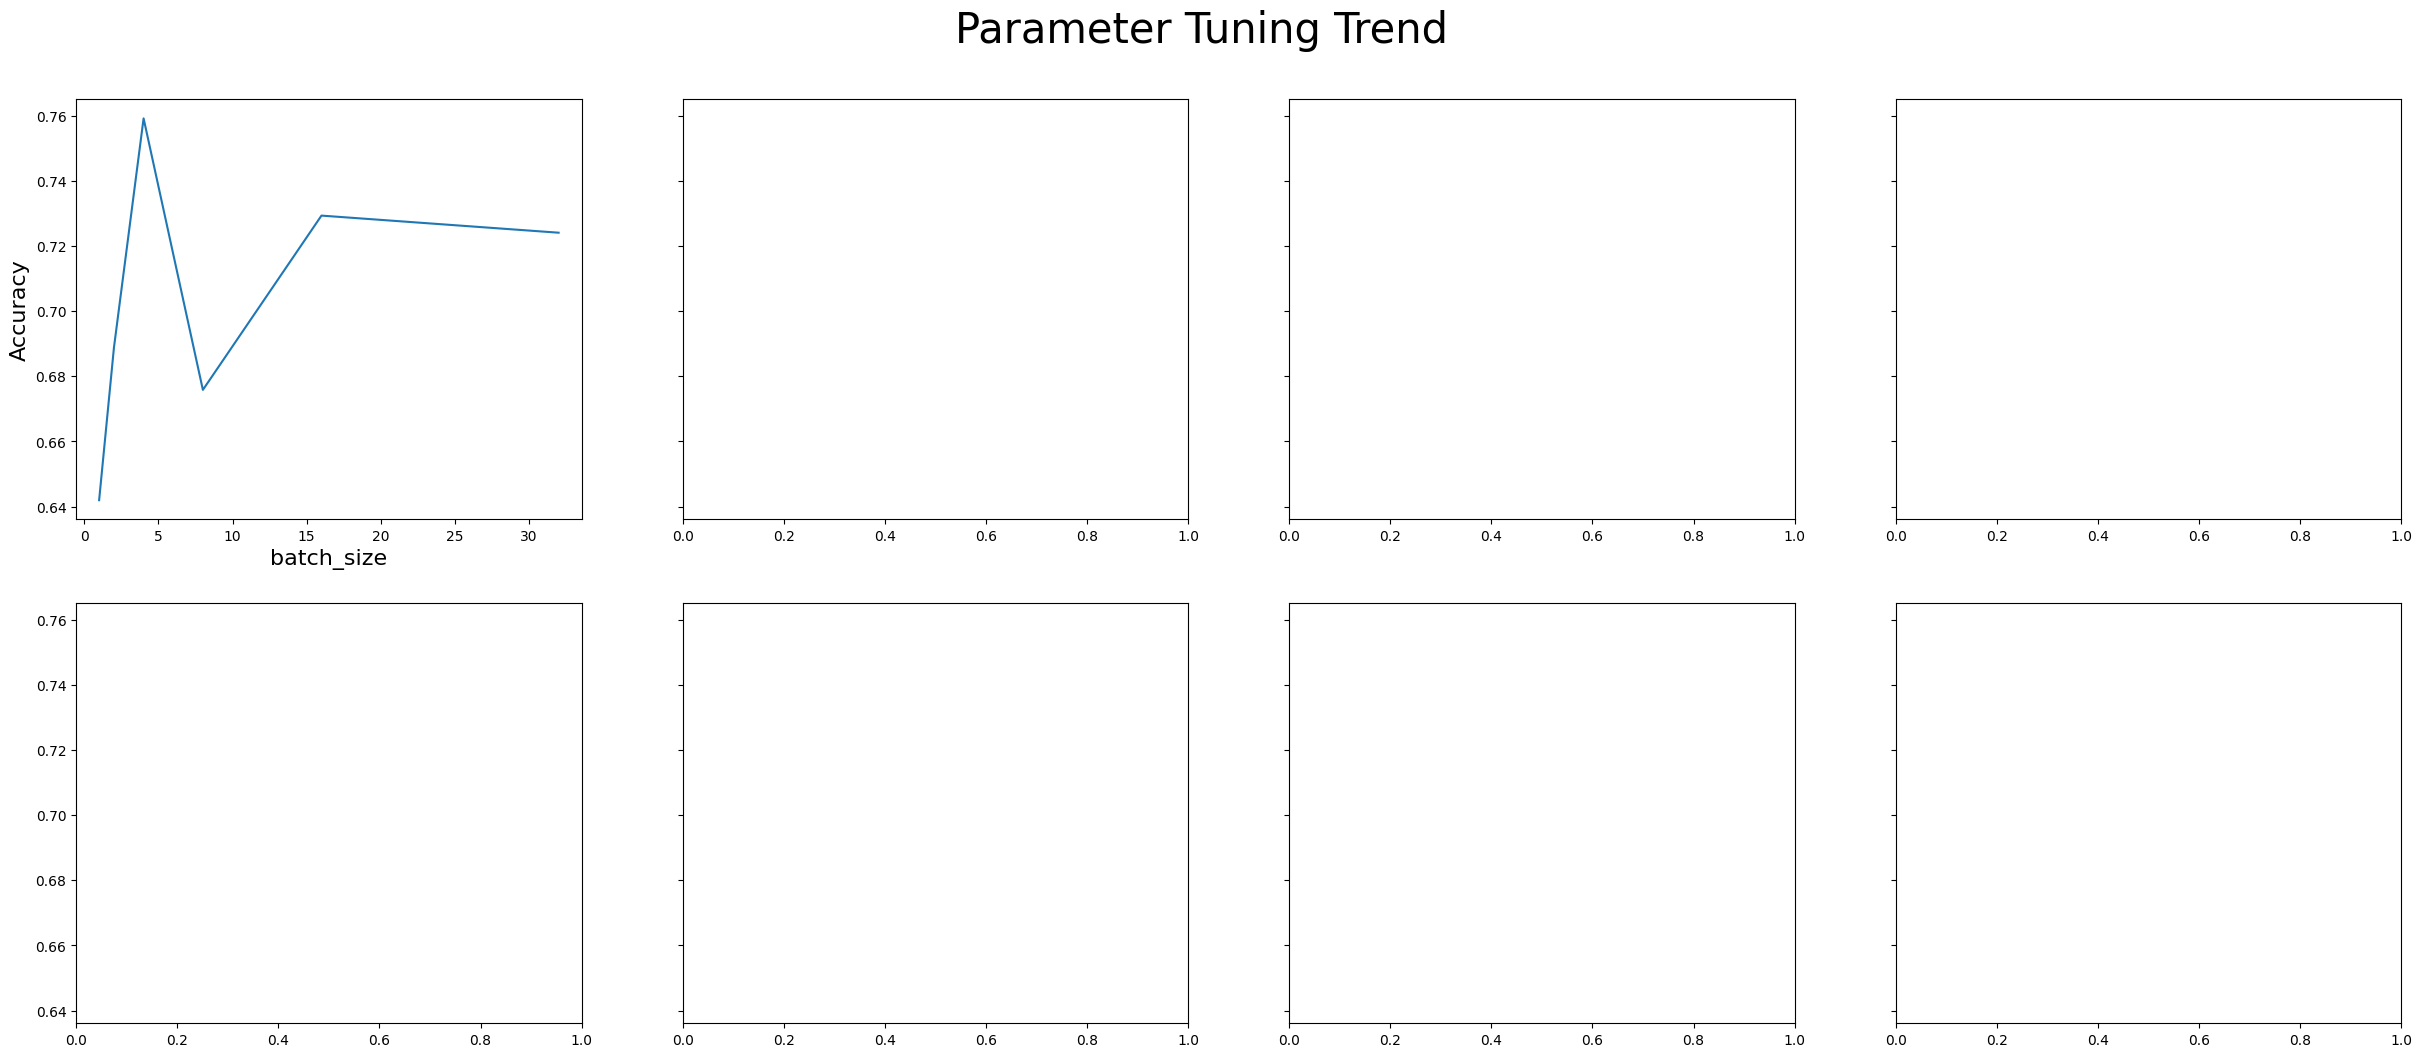

In [ ]:
df_batch = wrangle_results(results_batch)
visualize_trend(df_batch)

Although batch size of 2 has a higher accuracy result, the time cost significantly outweighs the benefit, so we'll go with batch size of 16.

In [ ]:
param_dict['batch_size'] = 16

run_test(X=X, y=y, param_dict=param_dict)

Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 16, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.2 mintues.
Mean Accuracy: 68.88%, Standard Deviation: 3.88%


0.6888414204120636

In [ ]:
# Let's get the baseline accuracy to compare
accuracy_baseline

0.747419685125351

This is weird... It's possible that due to randomness the result is not consistent. Wel'll still keep the best batch size and tune epochs.


Evaluating parameter "epochs" using value "40"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 40, 'batch_size': 16, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.7 mintues.
Mean Accuracy: 75.13%, Standard Deviation: 5.61%

Evaluating parameter "epochs" using value "60"...
Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 60, 'batch_size': 16, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 1.1 mintues.
Mean Accuracy: 76

<ipython-input-134-3bd640a0b766>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranges = df_long.groupby('parameter').apply(lambda grp: grp.value.max() - grp.value.min())
<ipython-input-134-3bd640a0b766>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd = df_long.groupby('parameter').apply(lambda grp: grp.value.std())


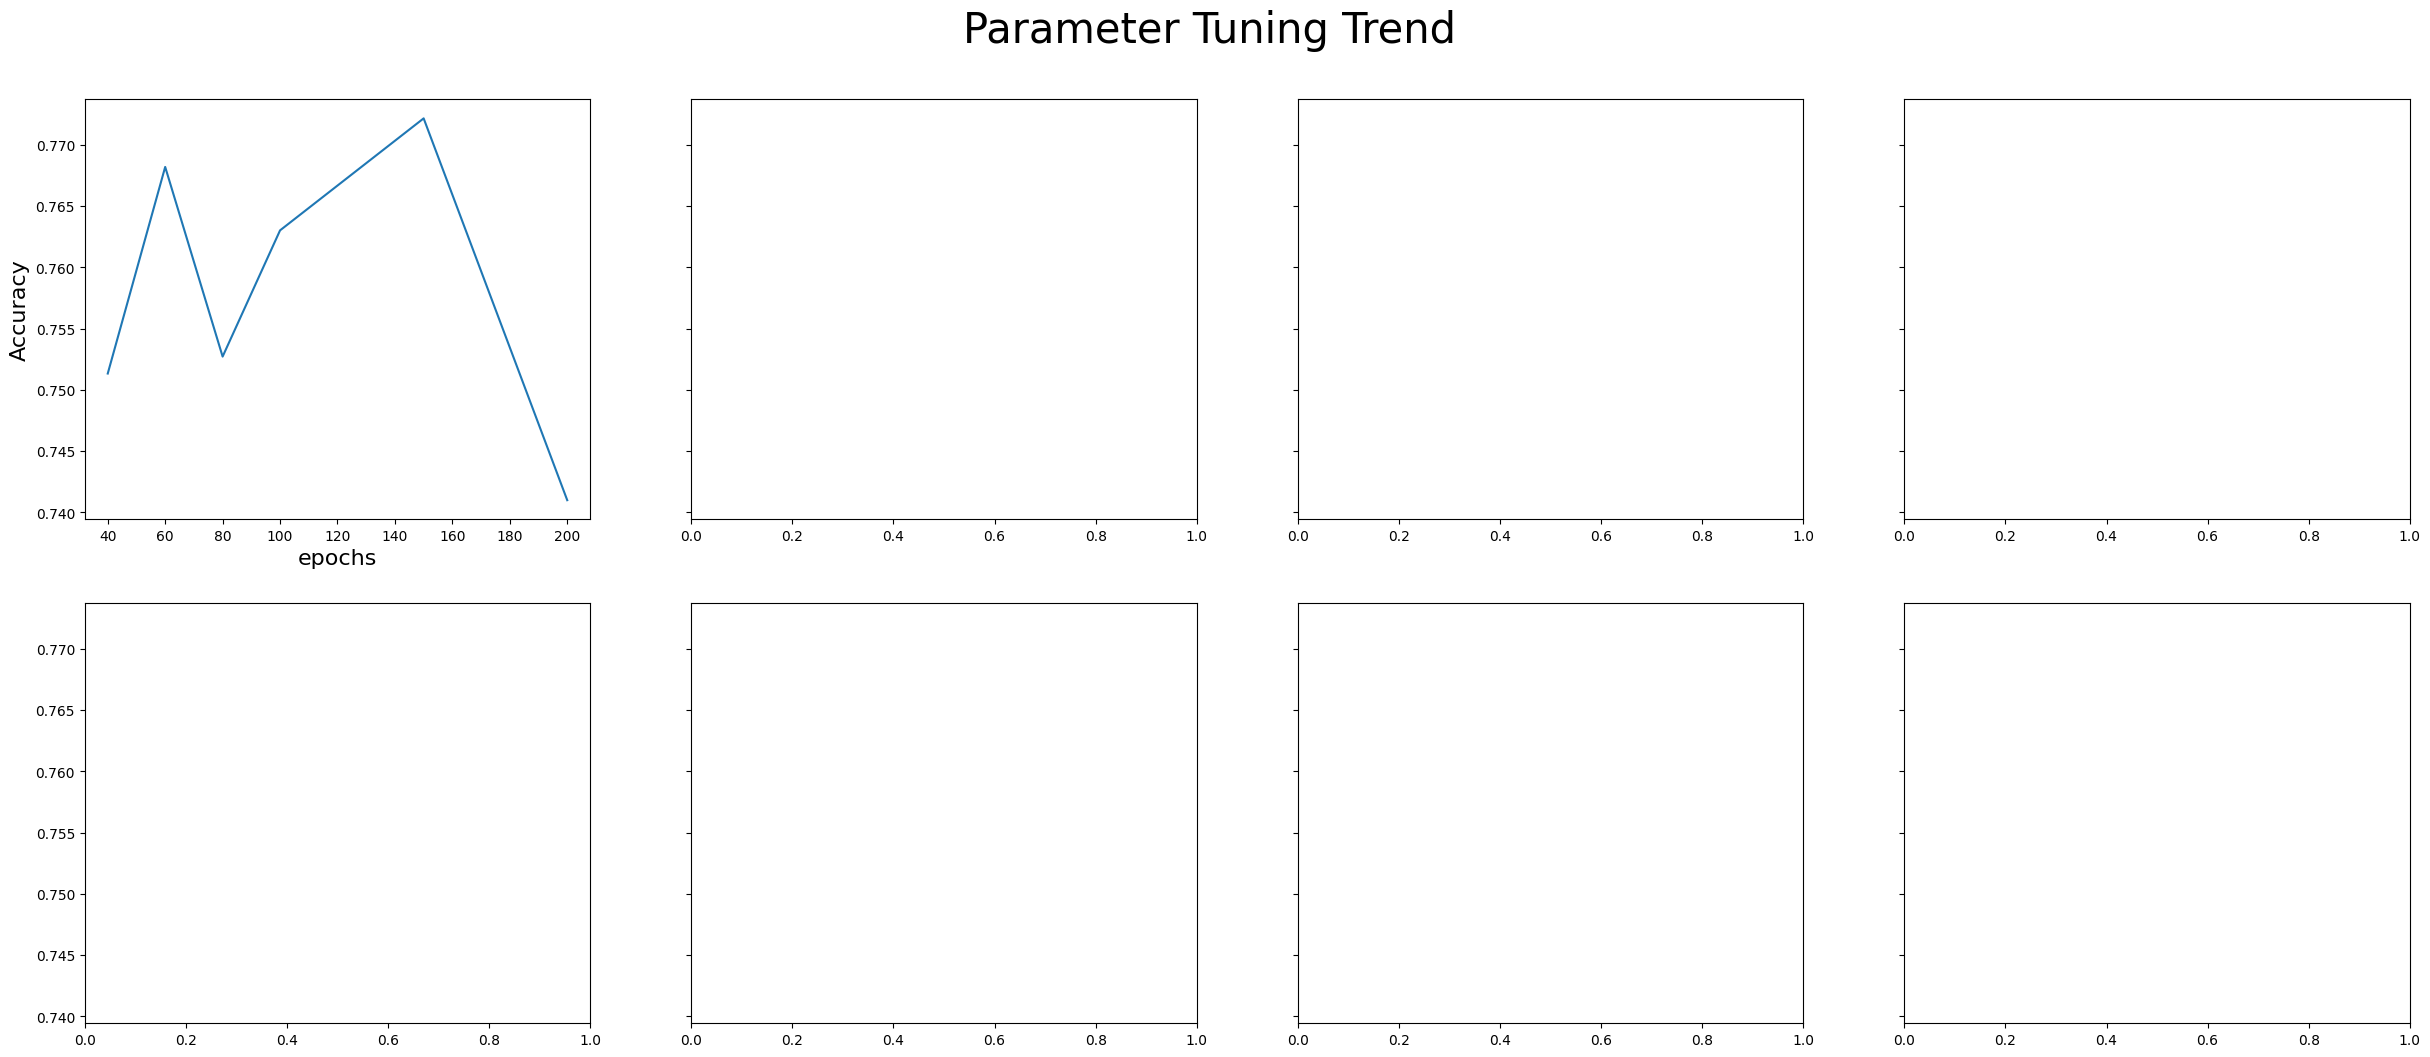

In [ ]:
epochs = [40, 60, 80, 100, 150, 200]

tuning_options = get_tuning_options(epochs=epochs)

results_epoch = run_test(X=X, y=y,
                         param_dict=param_dict,
                         tuning_options=tuning_options)

df_epoch = wrangle_results(results_epoch)
visualize_trend(df_epoch)

It seems the more epochs, the better the result is.

In [ ]:
epochs = get_best_options(df_epoch)
param_dict['epochs'] = epochs[0][1]

<ipython-input-134-3bd640a0b766>:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_options = df.groupby('parameter').apply(lambda grp: grp.nlargest(1, 'value'))[['parameter', 'option']].values.tolist()


Next, let's test whether standardizing the data is helpful. We'll first try with the baseline parameters.

In [ ]:
run_test(X=X_std, y=y, param_dict=param_dict_defaults)

Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.001, 'metrics': ['accuracy'], 'epochs': 10, 'batch_size': 4, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 0.6 mintues.
Mean Accuracy: 78.40%, Standard Deviation: 4.86%


0.7839712858200073

Wow, incredible! That's 76.95% vs. 71.61%, a more than 5 percentage points increase without doing any tuning! Let's now use the best param options obtained so far and the standardized data to train a final model.

In [ ]:
run_test(X=X_std, y=y, param_dict=param_dict)

Building model using param_dict:
 {'input_dim': 8, 'num_layers': 2, 'num_units': 8, 'activation': 'relu', 'activation_out': 'sigmoid', 'loss': 'binary_crossentropy', 'initializer': 'random_uniform', 'optimizer': 'Adam', 'learning_rate': 0.0025406681062440273, 'metrics': ['accuracy'], 'epochs': 150, 'batch_size': 16, 'one_hot': False}
Starting 10-fold cross-validation...
Finished cross-valiation. Took 2.5 mintues.
Mean Accuracy: 77.87%, Standard Deviation: 5.08%


0.7787252187728881

There we go! We have the [state-of-the-art accuracy result](https://www.kaggle.com/general/19387) now with 10-fold cross-validation! Although it seems parameter tuning's contribution in performance increase is marginal compared with data standardization.

## To-do's

- add dropout layer and regularization
- add time used in visualization